# Weather Forecast for Nakuru, Narok and Nyandarua


# Introduction
This is a weather forecast model designed for three counties in Kenya: Nakuru, Narok, and Nyandarua. The purpose of this project is to develop a prototype model to assist small-scale potato farmers in these counties, where a significant portion of the population relies on potato farming as a primary livelihood. The model aims to provide valuable weather insights—such as precipitation and temperature forecasts—to support critical agricultural activities, including planting, irrigation, and harvesting decisions.


# Context
In recent years, small-scale potato farmers in Nakuru, Narok, and Nyandarua have faced significant challenges due to increasing uncertainties in weather patterns. These counties, located in Kenya’s Rift Valley region, are known for their fertile soils and favorable climates for potato cultivation, making them key contributors to the country’s potato production. However, shifting weather conditions—driven by factors such as climate change—have disrupted traditional farming cycles. Erratic rainfall, prolonged droughts, and unexpected temperature fluctuations have led to reduced crop yields, with farmers often planting too early or too late to capitalize on optimal conditions.
These irregular weather patterns have resulted in substantial losses, including low crop production that fails to meet both household needs and market demands. For instance, delayed rains can stunt potato growth, while excessive rainfall can cause waterlogging and rot, diminishing harvest quality. Beyond the farm, these disruptions ripple through local economies: unpredictable supply affects market prices, reduces farmer incomes, and creates instability in potato-dependent food systems. Compounding the issue, many small-scale farmers lack access to timely, localized weather information, leaving them reliant on traditional knowledge that is increasingly misaligned with current climate realities.
This project emerges as a response to these challenges, aiming to bridge the information gap with a data-driven forecasting tool. By leveraging historical weather data and modern forecasting techniques, the model seeks to empower farmers with actionable insights, enabling them to adapt to changing conditions, optimize their planting schedules, and mitigate losses. The focus on Nakuru, Narok, and Nyandarua reflects their agricultural significance and the urgent need to support their potato farming communities amid growing climate uncertainty.

# Data Source
Data for this model was sourced from https://www.climateengine.org/ using shapefiles delineating the boundaries of Nakuru, Narok, and Nyandarua counties. The dataset spans over four decades, from January 1981 to August 2024, and includes key weather parameters essential for agricultural planning: precipitation (measured in millimeters) and temperature (measured in degrees Celsius). This historical data forms the foundation for generating reliable seasonal forecasts tailored to the region’s farming needs.

# Importing The necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from prophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


# Reading Precipitation and Temperature data of the Counties and renaming the columns

# Nakuru

In [2]:
nakuru = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Nakuru_Precipitation.csv")
nakuru.head()

,Unnamed: 0,"(mm) Precipitation (CHIRPS) at , 1981-01-01 to 2001-12-31"
0,01/01/1981,4.6987
1,06/01/1981,0.8556
2,11/01/1981,1.3108
3,16/01/1981,0.9053
4,21/01/1981,1.5834


In [3]:
nakuru1 = nakuru.rename(columns= {"Unnamed: 0":"Date", "(mm) Precipitation (CHIRPS) at , 1981-01-01 to 2001-12-31":"Precipitation(mm)"})

In [4]:
nakuru1.head()

,Date,Precipitation(mm)
0,01/01/1981,4.6987
1,06/01/1981,0.8556
2,11/01/1981,1.3108
3,16/01/1981,0.9053
4,21/01/1981,1.5834


In [5]:
nakuru2 = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Nakuru_Teamperature.csv")

In [6]:
nakuru2.head()

,Date,"(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31"
0,01/01/1981,17.5182
1,02/01/1981,17.2370
2,03/01/1981,16.9922
3,04/01/1981,16.3633
4,05/01/1981,17.4561


# Renaming Columns

In [7]:
nakuru2 = nakuru2.rename(columns= {"Unnamed: 0":"Date", "(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31":"Temperature(deg C)"})

In [8]:
nakuru2.head()

,Date,Temperature(deg C)
0,01/01/1981,17.5182
1,02/01/1981,17.2370
2,03/01/1981,16.9922
3,04/01/1981,16.3633
4,05/01/1981,17.4561


# Merging precipitation and Temperature data for Nakuru

In [9]:
nakuru_merged = pd.merge(nakuru1, nakuru2, on = "Date", how = "left")

In [10]:
nakuru_merged.head()

,Date,Precipitation(mm),Temperature(deg C)
0,01/01/1981,4.6987,17.5182
1,06/01/1981,0.8556,17.0672
2,11/01/1981,1.3108,17.4011
3,16/01/1981,0.9053,18.0232
4,21/01/1981,1.5834,18.3698


# Narok

In [11]:
narok_precip = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Narok_Precipitation.csv")
narok_precip.head()

,Unnamed: 0,"(mm) Precipitation (CHIRPS) at , 1981-01-01 to 2001-12-31"
0,01/01/1981,10.1739
1,06/01/1981,3.8975
2,11/01/1981,1.9244
3,16/01/1981,2.6966
4,21/01/1981,5.0979


# Renaming Columns

In [12]:
narok_precip = narok_precip.rename(columns= {"Unnamed: 0":"Date", "(mm) Precipitation (CHIRPS) at , 1981-01-01 to 2001-12-31":"Precipitation(mm)"})
narok_precip.head()

,Date,Precipitation(mm)
0,01/01/1981,10.1739
1,06/01/1981,3.8975
2,11/01/1981,1.9244
3,16/01/1981,2.6966
4,21/01/1981,5.0979


In [13]:
narok_temp = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Narok_Temperature.csv")
narok_temp.head()

,Unnamed: 0,"(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31"
0,01/01/1981,18.2463
1,02/01/1981,17.7314
2,03/01/1981,17.3115
3,04/01/1981,16.9257
4,05/01/1981,18.0185


In [14]:
narok_temp = narok_temp.rename(columns= {"Unnamed: 0":"Date", "(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31":"Temperature(deg C)"})
narok_temp.tail()

,Date,Temperature(deg C)
15960,14/09/2024,19.7609
15961,15/09/2024,19.6924
15962,16/09/2024,19.5915
15963,17/09/2024,18.4871
15964,18/09/2024,19.5894


# Merging precipitation and Temperature data for Narok

In [15]:
narok_merged = pd.merge(narok_precip, narok_temp, on = "Date", how = "left")
narok_merged.head()

,Date,Precipitation(mm),Temperature(deg C)
0,01/01/1981,10.1739,18.2463
1,06/01/1981,3.8975,17.0152
2,11/01/1981,1.9244,18.5228
3,16/01/1981,2.6966,19.2350
4,21/01/1981,5.0979,19.5772


In [16]:
nyandarua_precip = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Nyandarua_Precipitation.csv")
nyandarua_precip.head()

,Unnamed: 0,"(mm) Precipitation (CHIRPS) at CE_ID_0, 1981-01-01 to 1991-01-01"
0,01/01/1981,5.1126
1,06/01/1981,0.9727
2,11/01/1981,1.9473
3,16/01/1981,1.2767
4,21/01/1981,1.7337


In [17]:
nyandarua_precip = nyandarua_precip.rename(columns= {"Unnamed: 0":"Date", "(mm) Precipitation (CHIRPS) at CE_ID_0, 1981-01-01 to 1991-01-01":"Precipitation(mm)"})
nyandarua_precip

,Date,Precipitation(mm)
0,01/01/1981,5.1126
1,06/01/1981,0.9727
2,11/01/1981,1.9473
3,16/01/1981,1.2767
4,21/01/1981,1.7337
...,...,...
3157,06/11/2024,24.8267
3158,11/11/2024,25.9350
3159,16/11/2024,15.1274
3160,21/11/2024,52.3301


# Nyandarua

In [18]:
nyandarua_temp = pd.read_csv(r"C:\Users\HomePC\Downloads\Climate data\Nyandarua_Temperature.csv")
nyandarua_temp.head()

,Unnamed: 0,"(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31"
0,01/01/1981,15.8607
1,02/01/1981,15.6166
2,03/01/1981,15.4463
3,04/01/1981,15.3529
4,05/01/1981,16.1094


In [19]:
nyandarua_temp = nyandarua_temp.rename(columns = {"Unnamed: 0" : "Date", "(deg C) Mean Temperature (ERA5) at , 1981-01-01 to 2001-12-31": "Temperature(deg C)"})
nyandarua_temp.tail()

,Date,Temperature(deg C)
15960,14/09/2024,15.6428
15961,15/09/2024,15.6998
15962,16/09/2024,15.2953
15963,17/09/2024,14.8834
15964,18/09/2024,15.5699


In [20]:
nyandarua_merged = pd.merge(nyandarua_precip, nyandarua_temp, on = "Date", how = "left")
nyandarua_merged.tail()

,Date,Precipitation(mm),Temperature(deg C)
3157,06/11/2024,24.8267,NaN
3158,11/11/2024,25.9350,NaN
3159,16/11/2024,15.1274,NaN
3160,21/11/2024,52.3301,NaN
3161,26/11/2024,25.5393,NaN


The temperature and precipitation datasets had mismatched update timelines. The precipitation data was last updated on November 26, 2024, while the temperature data was last updated on September 18, 2024. To maintain consistency, precipitation data beyond November 18, 2024, was dropped.

In [21]:
nakuru_merged['Temperature(deg C)']= nakuru_merged['Temperature(deg C)'].dropna()
# nakuru_merged['Temperature(deg C)'] = nakuru_merged['Temperature(deg C)']
narok_merged['Temperature(deg C)'] = narok_merged['Temperature(deg C)'].dropna()
nyandarua_merged['Temperature(deg C)'] = nyandarua_merged['Temperature(deg C)'].dropna()

In [22]:
nakuru_merged.tail()

,Date,Precipitation(mm),Temperature(deg C)
3143,26/08/2024,8.5367,16.2454
3144,01/09/2024,14.5328,16.2420
3145,06/09/2024,7.3617,15.8456
3146,11/09/2024,5.1925,17.4943
3147,16/09/2024,21.9019,17.1311


In [23]:
nakuru_merged['Date'].dtype

dtype('O')

# Inputting the correct date format

In [24]:
nakuru_merged['Date'] = pd.to_datetime(nakuru_merged['Date'], format="%d/%m/%Y", errors="coerce")
narok_merged['Date'] = pd.to_datetime(narok_merged['Date'], format="%d/%m/%Y", errors="coerce")
nyandarua_merged['Date'] = pd.to_datetime(nyandarua_merged['Date'], format="%d/%m/%Y", errors="coerce")

In [25]:
nakuru_merged

,Date,Precipitation(mm),Temperature(deg C)
0,1981-01-01,4.6987,17.5182
1,1981-01-06,0.8556,17.0672
2,1981-01-11,1.3108,17.4011
3,1981-01-16,0.9053,18.0232
4,1981-01-21,1.5834,18.3698
...,...,...,...
3143,2024-08-26,8.5367,16.2454
3144,2024-09-01,14.5328,16.2420
3145,2024-09-06,7.3617,15.8456
3146,2024-09-11,5.1925,17.4943


# Rounding off

In [26]:
 nakuru_merged[['Precipitation(mm)','Temperature(deg C)']]= nakuru_merged[['Precipitation(mm)','Temperature(deg C)']].round(2)

In [27]:
nakuru_merged

,Date,Precipitation(mm),Temperature(deg C)
0,1981-01-01,4.70,17.52
1,1981-01-06,0.86,17.07
2,1981-01-11,1.31,17.40
3,1981-01-16,0.91,18.02
4,1981-01-21,1.58,18.37
...,...,...,...
3143,2024-08-26,8.54,16.25
3144,2024-09-01,14.53,16.24
3145,2024-09-06,7.36,15.85
3146,2024-09-11,5.19,17.49


In [28]:
 narok_merged[['Precipitation(mm)','Temperature(deg C)']]= narok_merged[['Precipitation(mm)','Temperature(deg C)']].round(2)

In [29]:
narok_merged

,Date,Precipitation(mm),Temperature(deg C)
0,1981-01-01,10.17,18.25
1,1981-01-06,3.90,17.02
2,1981-01-11,1.92,18.52
3,1981-01-16,2.70,19.24
4,1981-01-21,5.10,19.58
...,...,...,...
3143,2024-08-26,4.70,18.23
3144,2024-09-01,8.03,18.71
3145,2024-09-06,5.84,17.83
3146,2024-09-11,3.16,20.07


In [30]:
 nyandarua_merged[['Precipitation(mm)','Temperature(deg C)']]= nyandarua_merged[['Precipitation(mm)','Temperature(deg C)']].round(2)

In [31]:
nyandarua_merged

,Date,Precipitation(mm),Temperature(deg C)
0,1981-01-01,5.11,15.86
1,1981-01-06,0.97,15.68
2,1981-01-11,1.95,15.16
3,1981-01-16,1.28,16.52
4,1981-01-21,1.73,16.20
...,...,...,...
3157,2024-11-06,24.83,NaN
3158,2024-11-11,25.94,NaN
3159,2024-11-16,15.13,NaN
3160,2024-11-21,52.33,NaN


In [32]:
nyandarua_merged = nyandarua_merged.dropna(subset=['Temperature(deg C)'])

In [33]:
nyandarua_merged

,Date,Precipitation(mm),Temperature(deg C)
0,1981-01-01,5.11,15.86
1,1981-01-06,0.97,15.68
2,1981-01-11,1.95,15.16
3,1981-01-16,1.28,16.52
4,1981-01-21,1.73,16.20
...,...,...,...
3143,2024-08-26,11.15,14.92
3144,2024-09-01,12.17,14.91
3145,2024-09-06,6.00,14.44
3146,2024-09-11,4.69,15.61


# Exploratory Data Analysis

# Nyandarua

<Axes: xlabel='Temperature(deg C)'>

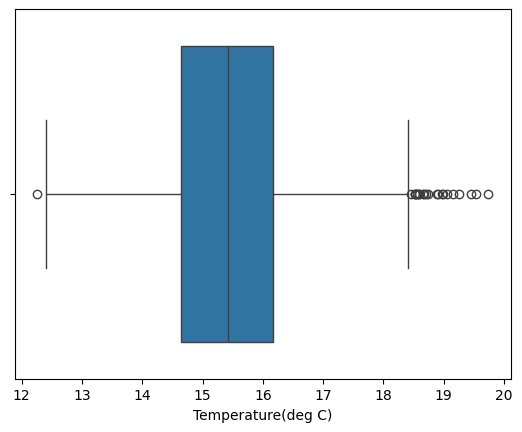

In [34]:
sns.boxplot(x=nyandarua_merged['Temperature(deg C)'])


The plot above reveals several high-temperature outliers above 18°C and a single low-temperature outlier below 13°C. These outliers may indicate natural variations in temperature, such as seasonal changes or localized climate effects.


<Axes: xlabel='Temperature(deg C)'>

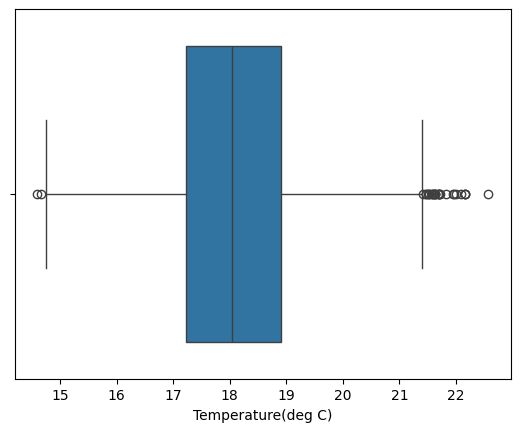

In [35]:
sns.boxplot(x=narok_merged['Temperature(deg C)'])

The median temperature for Narok is approximately 18.5°C, indicating a balanced central tendency. The whiskers extend from around 15°C to 21°C, representing the range within 1.5 times the interquartile range (IQR). A few low-temperature outliers (~15°C) and multiple high-temperature outliers (>21°C) suggest occasional extreme temperatures. The presence of more high-temperature outliers indicates a slight right skew, implying periodic temperature spikes. Overall, the plot reveals a generally stable temperature distribution, with occasional variations that may be influenced by seasonal or climatic factors.

<Axes: xlabel='Temperature(deg C)'>

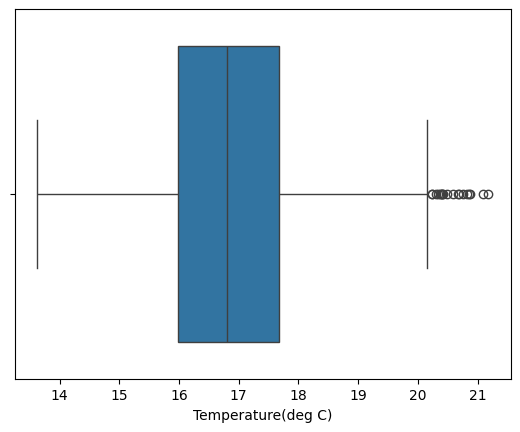

In [36]:
sns.boxplot(x=nakuru_merged['Temperature(deg C)'])

 The median temperature is approximately 18.5°C, indicating a fairly balanced central tendency. The whiskers extend from around 15°C to 21°C, capturing the majority of the data points within 1.5 times the interquartile range (IQR). The presence of a few low-temperature outliers (~15°C) and multiple high-temperature outliers above 21°C suggests occasional temperature extremes. The right skew in the distribution, with more high-end outliers, indicates periods of increased temperatures.


In [37]:
nyandarua_merged['Temp_7day_avg'] = nyandarua_merged['Temperature(deg C)'].rolling(window=7).mean()


C:\Users\HomePC\AppData\Local\Temp\ipykernel_18360\500598511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyandarua_merged['Temp_7day_avg'] = nyandarua_merged['Temperature(deg C)'].rolling(window=7).mean()


In [38]:
nyandarua_merged

,Date,Precipitation(mm),Temperature(deg C),Temp_7day_avg
0,1981-01-01,5.11,15.86,NaN
1,1981-01-06,0.97,15.68,NaN
2,1981-01-11,1.95,15.16,NaN
3,1981-01-16,1.28,16.52,NaN
4,1981-01-21,1.73,16.20,NaN
...,...,...,...,...
3143,2024-08-26,11.15,14.92,14.651429
3144,2024-09-01,12.17,14.91,14.585714
3145,2024-09-06,6.00,14.44,14.582857
3146,2024-09-11,4.69,15.61,14.670000


# Analyzing Seasonal Temperature Variations Across Three Counties

# Nyandarua

C:\Users\HomePC\AppData\Local\Temp\ipykernel_18360\3899788823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyandarua_merged['Month'] = nyandarua_merged['Date'].dt.month


<Axes: xlabel='Month'>

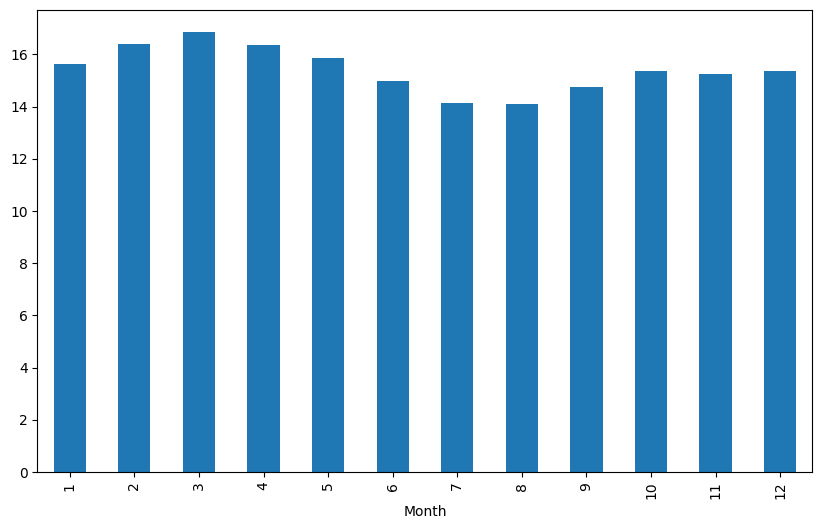

In [39]:
#Seasonal Variation of Temperature
plt.figure(figsize=(10, 6))
nyandarua_merged['Month'] = nyandarua_merged['Date'].dt.month
nyandarua_merged.groupby('Month')['Temperature(deg C)'].mean().plot(kind='bar')

### Observations:
- The highest average temperatures occur between **January and April**, peaking in **March**.
- A **gradual decline** in temperature is observed from **May to August**, with the lowest point around **July and August**.
- Temperatures **start rising again from September** and stabilize towards the end of the year.


# Nakuru

<Axes: xlabel='Month'>

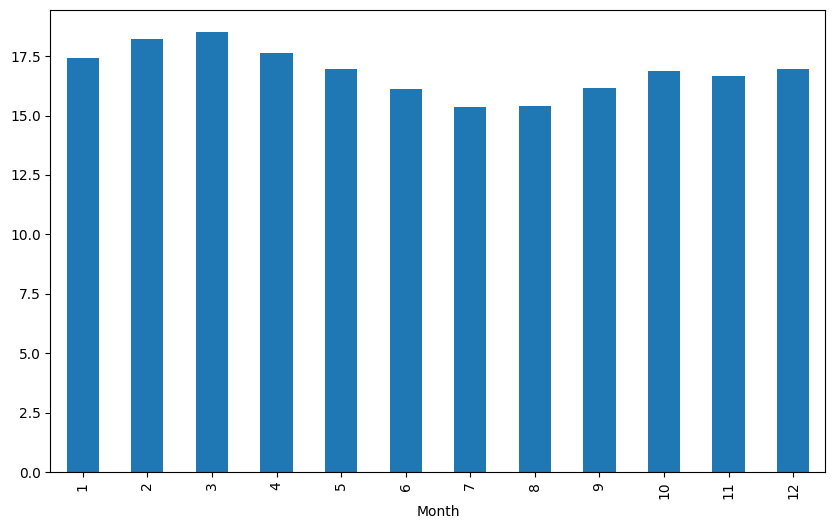

In [40]:
plt.figure(figsize=(10, 6))
nakuru_merged['Month'] = nakuru_merged['Date'].dt.month
nakuru_merged.groupby('Month')['Temperature(deg C)'].mean().plot(kind='bar')

### Observations:
- The highest average temperatures occur between **January and April**, with a peak in **March**.
- A **gradual temperature decline** is observed from **May to July**, reaching its lowest around **July and August**.
- **Temperatures rise again from September**, peaking in **October**, and remain relatively stable toward the end of the year.


# Narok

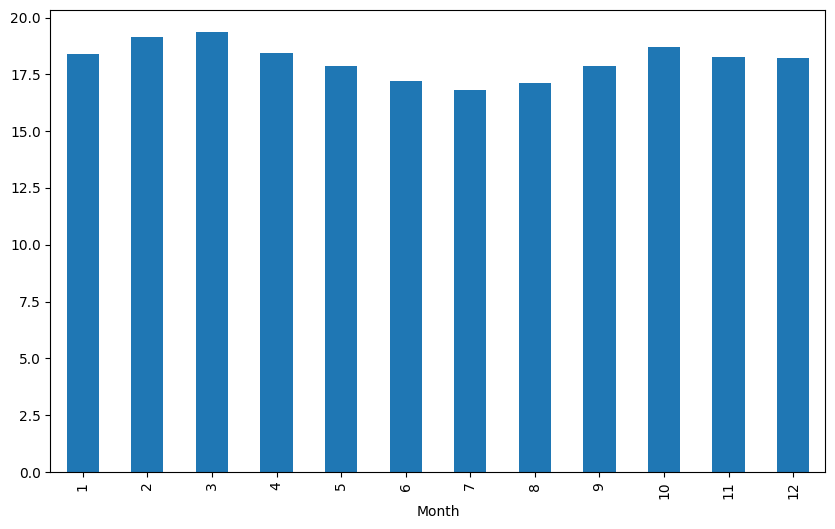

In [41]:
plt.figure(figsize=(10, 6))
narok_merged['Month'] = narok_merged['Date'].dt.month
narok_merged.groupby('Month')['Temperature(deg C)'].mean().plot(kind='bar')
plt.show()

### Observations:
- The highest temperatures occur between **January and April**, peaking in **March**.
- A **gradual decline** is seen from **May to July**, with the lowest temperatures around **July**.
- Temperatures **rise slightly from August** and **peak again in October** before stabilizing towards the end of the year.


### Seasonal Temperature Variation Across the Three Counties

- The highest average temperatures occur between **January and April**, with a peak around **March**.
- A **gradual decline** in temperature is observed from **May to August**, reaching the lowest point around **July**.
- Temperatures **start rising again from September** and stabilize towards the end of the year.
- Since these counties **neighbor each other**, they exhibit similar seasonal temperature patterns.


In [42]:
narok_merged

,Date,Precipitation(mm),Temperature(deg C),Month
0,1981-01-01,10.17,18.25,1
1,1981-01-06,3.90,17.02,1
2,1981-01-11,1.92,18.52,1
3,1981-01-16,2.70,19.24,1
4,1981-01-21,5.10,19.58,1
...,...,...,...,...
3143,2024-08-26,4.70,18.23,8
3144,2024-09-01,8.03,18.71,9
3145,2024-09-06,5.84,17.83,9
3146,2024-09-11,3.16,20.07,9


# Analyzing Seasonal Precipitation Variations Across Three Counties

# Narok

<Axes: xlabel='Month'>

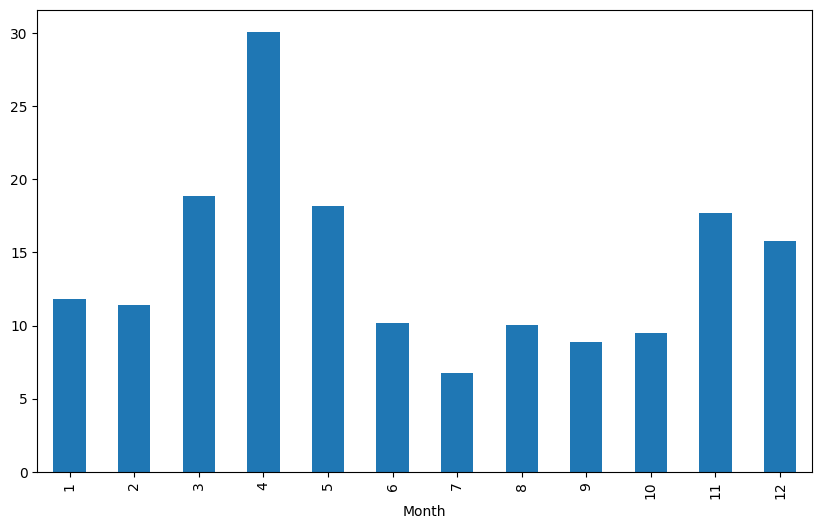

In [43]:
plt.figure(figsize=(10, 6))
narok_merged['Month'] = narok_merged['Date'].dt.month
narok_merged.groupby('Month')['Precipitation(mm)'].mean().plot(kind='bar')

### Seasonal Precipitation Variation in Narok

- **Peak rainfall occurs in April**, showing the highest precipitation levels of the year.  
- **Moderate rainfall** is observed in **March, May, and November**.  
- **Drier months** include **July and August**, with the lowest recorded precipitation.  
- Rainfall **gradually increases from September to December**, stabilizing towards the end of the year.  
- This pattern is typical for regions experiencing **bimodal rainfall**, with long rains in **March–May** and short rains in **October–December**.


# Nyandarua

C:\Users\HomePC\AppData\Local\Temp\ipykernel_18360\3209117391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyandarua_merged['Month'] = nyandarua_merged['Date'].dt.month


<Axes: xlabel='Month'>

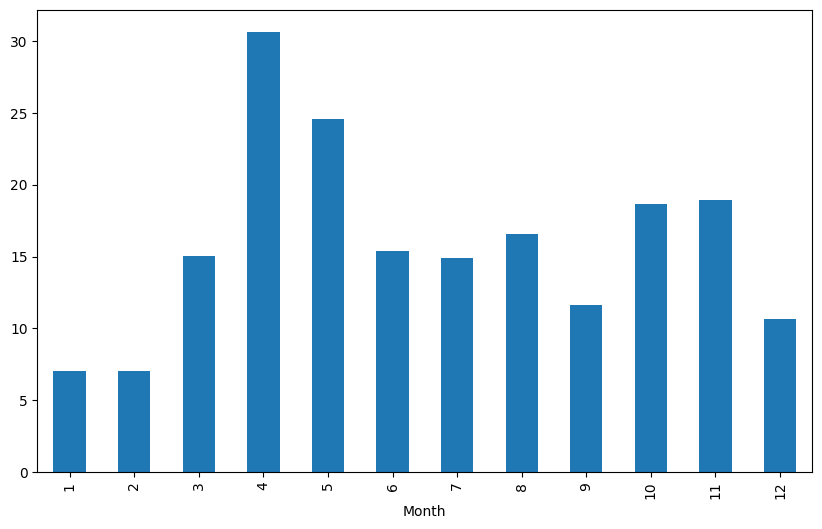

In [44]:
plt.figure(figsize=(10, 6))
nyandarua_merged['Month'] = nyandarua_merged['Date'].dt.month
nyandarua_merged.groupby('Month')['Precipitation(mm)'].mean().plot(kind='bar')

### Seasonal Precipitation Variation in Nyandarua

- **Peak rainfall occurs in April**, recording the highest precipitation levels.  
- **Significant rainfall** is also observed in **March, May, and November**.  
- **Moderate precipitation** continues through **June, July, and August**.  
- **Drier months include January, February, and September**, with lower rainfall levels.  
- Rainfall **gradually increases from October to December**, following a bimodal pattern.  
- This distribution aligns with **long rains in March–May** and **short rains in October–December**.  


<Axes: xlabel='Month'>

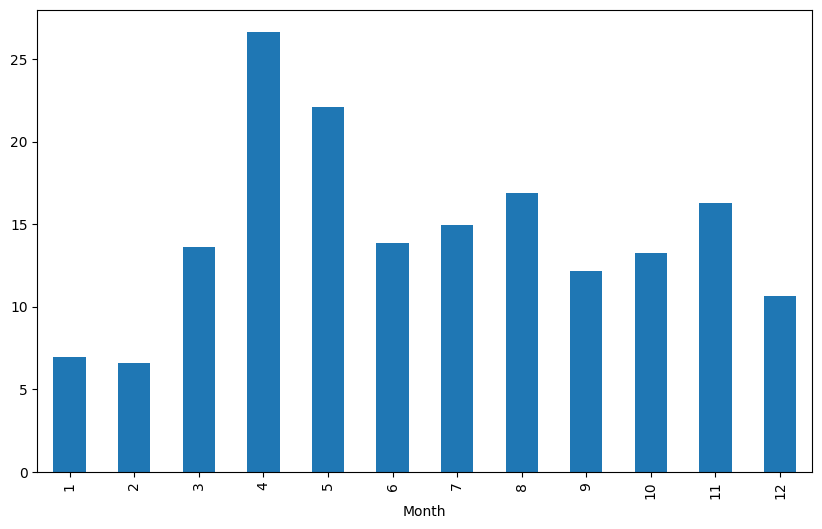

In [45]:
plt.figure(figsize=(10, 6))
nakuru_merged['Month'] = nakuru_merged['Date'].dt.month
nakuru_merged.groupby('Month')['Precipitation(mm)'].mean().plot(kind='bar')

### Seasonal Precipitation Variation in Nakuru

- **April experiences the highest rainfall**, marking the peak precipitation month.  
- **Significant rainfall** also occurs in **March, May, and November**.  
- **Moderate precipitation** is observed in **June, July, and August**, maintaining a steady pattern.  
- **Drier months include January, February, and September**, with relatively low rainfall.  
- Rainfall **gradually rises from October to December**, showing a bimodal pattern.  
- This trend reflects **long rains in March–May** and **short rains in October–December**, typical of the region.  


## Seasonal Precipitation Patterns in Neighboring Counties  

### Key Observations  

- **Bimodal Rainfall Distribution**  
  - **Long rains (March–May):** Peak precipitation occurs in **April**, with **March and May** also experiencing high rainfall.  
  - **Short rains (October–December):** A secondary increase in rainfall is observed, with **October and November** showing moderate precipitation.  

- **Dry Seasons**  
  - **July and August** consistently record the lowest rainfall across all three counties.  
  - **January and February** also remain relatively dry, though slightly wetter than mid-year months.  

- **Gradual Seasonal Transitions**  
  - Rainfall **decreases after May**, marking the end of the long rainy season.  
  - **A steady increase starts in September**, leading into the short rainy season.  

### Conclusion  
The precipitation trends indicate a **shared climatic influence** across the three counties, likely due to their **geographical proximity and similar elevation profiles**. This pattern aligns with **typical equatorial bimodal rainfall regimes**, driven by the **Intertropical Convergence Zone (ITCZ) movement**.  


## Augmented Dickey-Fuller (ADF) Test for Stationarity
The ADF test is a statistical test used to determine whether a given time series is stationary or non-stationary. Stationarity is important in time series analysis because many forecasting models assume a constant mean and variance over time.

## Interpretation
ADF Statistic: A more negative value suggests stronger evidence of stationarity.

## P-value:

If p-value < 0.05, we reject the null hypothesis (H₀), meaning the data is stationary.

If p-value ≥ 0.05, we fail to reject H₀, meaning the data is non-stationary.

## Why It Matters?
A stationary time series has constant statistical properties over time (e.g., mean, variance).

If the data is non-stationary, transformations like differencing or detrending may be required before applying forecasting models.

In [46]:
adf_test = adfuller(nyandarua_merged['Precipitation(mm)'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")

ADF Statistic: -14.926535017680617
P-value: 1.3864006841226413e-27


In [47]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, column_name, county_name):
    result = adfuller(series.dropna())  # Ensure no NaN values
    print(f"\n--- ADF Test for {county_name} ({column_name}) ---")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

# Dictionary of county dataframes
county_data = {
    "Nyandarua": nyandarua_merged,
    "Nakuru": nakuru_merged,
    "Narok": narok_merged
}

# Run ADF test for each county and variable
for county, data in county_data.items():
    adf_test(data["Temperature(deg C)"], "Temperature(deg C)", county)
    adf_test(data["Precipitation(mm)"], "Precipitation(mm)", county)



--- ADF Test for Nyandarua (Temperature(deg C)) ---
ADF Statistic: -12.712879323912205
P-value: 1.0211304495894966e-23
Stationary

--- ADF Test for Nyandarua (Precipitation(mm)) ---
ADF Statistic: -14.926535017680617
P-value: 1.3864006841226413e-27
Stationary

--- ADF Test for Nakuru (Temperature(deg C)) ---
ADF Statistic: -12.167913610205975
P-value: 1.4429902845864323e-22
Stationary

--- ADF Test for Nakuru (Precipitation(mm)) ---
ADF Statistic: -15.873723268409956
P-value: 8.920516053513313e-29
Stationary

--- ADF Test for Narok (Temperature(deg C)) ---
ADF Statistic: -11.768764194338615
P-value: 1.1027424390224835e-21
Stationary

--- ADF Test for Narok (Precipitation(mm)) ---
ADF Statistic: -12.934544591941036
P-value: 3.6411326324905275e-24
Stationary



#### Training SARIMAX for Nyandarua ####

Historical Data Summary for Nyandarua - Temperature:
count    3146.000000
mean       15.428013
std         1.136294
min        12.260000
25%        14.640000
50%        15.420000
75%        16.160000
max        19.740000
Name: Temperature(deg C), dtype: float64
Train set size: 2517, Test set size: 629


C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



✔ Best SARIMAX Order: (2, 0, 2), Seasonal Order: (0, 1, 1, 12) (AIC: 5315.10)


C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Validation Metrics for Nyandarua - Temperature:
  MAE: 0.96
  RMSE: 1.25


C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.




Historical Data Summary for Nyandarua - Precipitation:
count    3146.000000
mean       15.939873
std        15.241948
min         0.760000
25%         6.292500
50%        11.035000
75%        20.040000
max       135.830000
Name: Precipitation(mm), dtype: float64
Train set size: 2517, Test set size: 629
✔ Best SARIMAX Order: (2, 0, 2), Seasonal Order: (0, 1, 1, 12) (AIC: 19735.53)
Validation Metrics for Nyandarua - Precipitation:
  MAE: 11.84
  RMSE: 18.26


C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.




#### Training SARIMAX for Nakuru ####

Historical Data Summary for Nakuru - Temperature:
count    3146.000000
mean       16.856898
std         1.273102
min        13.630000
25%        15.980000
50%        16.800000
75%        17.670000
max        21.180000
Name: Temperature(deg C), dtype: float64
Train set size: 2519, Test set size: 629


C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



✔ Best SARIMAX Order: (2, 0, 2), Seasonal Order: (0, 1, 1, 12) (AIC: 5518.25)
⚠ Validation failed for Nakuru - Temperature: Input contains NaN.

Historical Data Summary for Nakuru - Precipitation:
count    3148.000000
mean       14.509533
std        13.058733
min         0.680000
25%         5.930000
50%        10.525000
75%        18.297500
max       120.360000
Name: Precipitation(mm), dtype: float64
Train set size: 2519, Test set size: 629
✔ Best SARIMAX Order: (1, 0, 2), Seasonal Order: (0, 1, 1, 12) (AIC: 18951.37)
Validation Metrics for Nakuru - Precipitation:
  MAE: 10.49
  RMSE: 15.65

#### Training SARIMAX for Narok ####

Historical Data Summary for Narok - Temperature:
count    3146.000000
mean       18.110544
std         1.226271
min        14.600000
25%        17.232500
50%        18.040000
75%        18.900000
max        22.570000
Name: Temperature(deg C), dtype: float64
Train set size: 2519, Test set size: 629
✔ Best SARIMAX Order: (1, 0, 2), Seasonal Order: (0, 1, 1, 12) 

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result 

Nyandarua - Temperature Forecast:
3146    15.100050
3147    15.228409
3148    15.234386
3149    15.286991
3150    15.389829
Name: predicted_mean, dtype: float64
Nyandarua - Precipitation Forecast:
3146    13.748047
3147    12.764712
3148    12.768713
3149    15.411098
3150    13.272541
Name: predicted_mean, dtype: float64
Nakuru - Precipitation Forecast:
3148    15.987989
3149    16.874202
3150    13.701878
3151    14.631351
3152    15.223870
Name: predicted_mean, dtype: float64
Narok - Precipitation Forecast:
3148    17.135863
3149    17.880144
3150    14.280423
3151    15.348627
3152    15.649739
Name: predicted_mean, dtype: float64


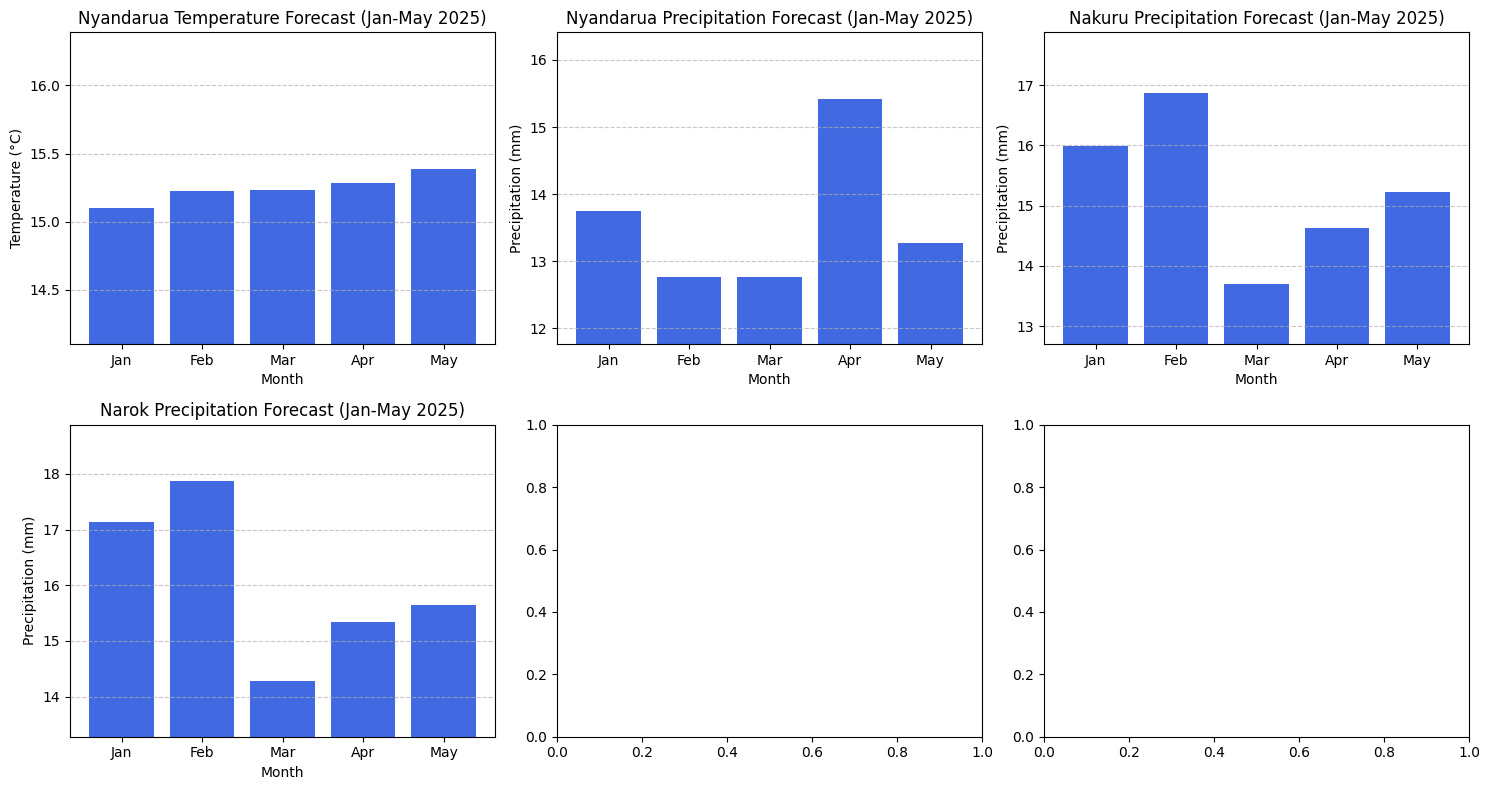

In [77]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

def auto_select_sarimax_order(series, seasonal_period=12, p_range=(0, 3), d_range=(0, 1), q_range=(0, 3), 
                              P_range=(0, 2), D_range=(1, 2), Q_range=(0, 2)):
    """
    Auto-selects the best SARIMAX order using AIC, enforcing seasonality.
    """
    series = series.dropna()
    if len(series) < seasonal_period * 2:
        print("Insufficient data for SARIMAX order selection!")
        return None, None

    best_aic = np.inf
    best_order = None
    best_seasonal_order = None

    pdq = list(itertools.product(range(*p_range), range(*d_range), range(*q_range)))
    seasonal_pdq = list(itertools.product(range(*P_range), range(*D_range), range(*Q_range), [seasonal_period]))

    for order in pdq:
        for seasonal_order in seasonal_pdq:
            try:
                model = SARIMAX(series, order=order, seasonal_order=seasonal_order, 
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = order
                    best_seasonal_order = seasonal_order
            except Exception as e:
                continue
    
    if best_order is None:
        print("⚠ Failed to find a valid SARIMAX model!")
        return None, None
    
    print(f"✔ Best SARIMAX Order: {best_order}, Seasonal Order: {best_seasonal_order} (AIC: {best_aic:.2f})")
    return best_order, best_seasonal_order

def train_sarimax(series, county, variable, test_size=0.2):
    """
    Trains a SARIMAX model with train-test split validation.
    """
    if len(series) < 24:
        print(f"⚠ Not enough data for {county} - {variable}!")
        return None
    
    print(f"\nHistorical Data Summary for {county} - {variable}:\n{series.describe()}")
    
    # Train-test split
    n_test = int(len(series) * test_size)
    if n_test < 1:
        print(f"⚠ Test set too small for {county} - {variable}!")
        return None
    train = series[:-n_test]
    test = series[-n_test:]
    
    print(f"Train set size: {len(train)}, Test set size: {len(test)}")
    
    # Select best SARIMAX order using training data
    best_order, best_seasonal_order = auto_select_sarimax_order(train)
    if best_order is None or best_seasonal_order is None:
        print(f"⚠ No valid SARIMAX model found for {county} - {variable}!")
        return None
    
    # Train model on training data
    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order, 
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    
    # Validate on test set
    try:
        forecast = results.get_forecast(steps=len(test)).predicted_mean
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))
        print(f"Validation Metrics for {county} - {variable}:")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
    except Exception as e:
        print(f"⚠ Validation failed for {county} - {variable}: {e}")
        return None
    
    # Refit model on full dataset for forecasting
    model = SARIMAX(series, order=best_order, seasonal_order=best_seasonal_order, 
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    
    return results

def plot_forecast_bar(forecast, county_name, column_name, ax):
    """
    Plots a bar graph for monthly forecast for Jan-May 2025 on a given axis.
    """
    if forecast is None or len(forecast) == 0:
        print(f"⚠ No forecast available for {county_name} - {column_name}")
        return

    months = pd.date_range(start='2025-01-01', periods=len(forecast), freq='M').strftime('%b')
    ax.bar(months, forecast.values, color="royalblue")
    ax.set_xlabel("Month")
    ax.set_ylabel("Temperature (°C)" if "Temperature" in column_name else "Precipitation (mm)")
    ax.set_title(f"{county_name} {column_name} Forecast (Jan-May 2025)")
    ax.set_ylim(min(forecast) - 1, max(forecast) + 1)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Define County Data
county_data = {
    "Nyandarua": nyandarua_merged, 
    "Nakuru": nakuru_merged,
    "Narok": narok_merged
}

# Store Trained Models
trained_models = {}

# Train Models for Each County
for county, data in county_data.items():
    print(f"\n#### Training SARIMAX for {county} ####")
    trained_models[(county, "Temperature")] = train_sarimax(data["Temperature(deg C)"], county, "Temperature", test_size=0.2)
    trained_models[(county, "Precipitation")] = train_sarimax(data["Precipitation(mm)"], county, "Precipitation", test_size=0.2)

# Generate Forecasts and Plot
forecast_data = []
months = pd.date_range(start='2025-01-01', periods=5, freq='M').strftime('%Y-%m')

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
idx = 0

for (county, column), model in trained_models.items():
    if model is not None:
        forecast = model.get_forecast(steps=5).predicted_mean
        print(f"{county} - {column} Forecast:\n{forecast}")
        plot_forecast_bar(forecast, county, column, axes[idx])
        idx += 1
        
        for i, value in enumerate(forecast):
            forecast_data.append({
                "County": county,
                "Variable": column,
                "Month": months[i],
                "Value": value
            })

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save to CSV
forecast_df = pd.DataFrame(forecast_data)
forecast_df.to_csv("county_forecasts_jan_may_2025")

In [49]:
forecast1 = model.get_forecast(steps=5).predicted_mean
print(forecast1)

3148    17.135863
3149    17.880144
3150    14.280423
3151    15.348627
3152    15.649739
Name: predicted_mean, dtype: float64


In [51]:
!pip install opencage


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
merged_data = narok_merged.merge(nakuru_merged, on = 'Date', suffixes=('_narok', '_nakuru')) \
                    .merge(nyandarua_merged, on="Date", suffixes=('', '_nyandarua'))

In [53]:
merged_data.rename(columns={'Temperature(deg C)': 'temperature_nyandarua', 
                          'Precipitation(mm)': 'precipitation_nyandarua'}, inplace=True)

In [60]:
# merged_data = merged_data.drop(columns = ['Month_narok', 'Month_nakuru'])

In [54]:
merged_data

,Date,Precipitation(mm)_narok,Temperature(deg C)_narok,Month_narok,Precipitation(mm)_nakuru,Temperature(deg C)_nakuru,Month_nakuru,precipitation_nyandarua,temperature_nyandarua,Temp_7day_avg,Month
0,1981-01-01,10.17,18.25,1,4.70,17.52,1,5.11,15.86,NaN,1
1,1981-01-06,3.90,17.02,1,0.86,17.07,1,0.97,15.68,NaN,1
2,1981-01-11,1.92,18.52,1,1.31,17.40,1,1.95,15.16,NaN,1
3,1981-01-16,2.70,19.24,1,0.91,18.02,1,1.28,16.52,NaN,1
4,1981-01-21,5.10,19.58,1,1.58,18.37,1,1.73,16.20,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
3141,2024-08-26,4.70,18.23,8,8.54,16.25,8,11.15,14.92,14.651429,8
3142,2024-09-01,8.03,18.71,9,14.53,16.24,9,12.17,14.91,14.585714,9
3143,2024-09-06,5.84,17.83,9,7.36,15.85,9,6.00,14.44,14.582857,9
3144,2024-09-11,3.16,20.07,9,5.19,17.49,9,4.69,15.61,14.670000,9


In [55]:
merged_data = merged_data.rename(columns ={'temperature_nyandarua':'Temperature(deg C)_nyandarua', 'precipitation_nyandarua': 'Precipitation(mm)_nyandarua'})

In [65]:
!pip install prophet



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Forecasting: Narok Temperature


12:12:07 - cmdstanpy - INFO - Chain [1] start processing
12:12:07 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Narok_Temperature_2025_forecast_prophet.csv
Forecasting: Narok Precipitation


12:12:09 - cmdstanpy - INFO - Chain [1] start processing
12:12:09 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Narok_Precipitation_2025_forecast_prophet.csv
Forecasting: Nakuru Temperature


12:12:11 - cmdstanpy - INFO - Chain [1] start processing
12:12:12 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Nakuru_Temperature_2025_forecast_prophet.csv
Forecasting: Nakuru Precipitation


12:12:14 - cmdstanpy - INFO - Chain [1] start processing
12:12:14 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Nakuru_Precipitation_2025_forecast_prophet.csv
Forecasting: Nyandarua Temperature


12:12:16 - cmdstanpy - INFO - Chain [1] start processing
12:12:16 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Nyandarua_Temperature_2025_forecast_prophet.csv
Forecasting: Nyandarua Precipitation


12:12:19 - cmdstanpy - INFO - Chain [1] start processing
12:12:19 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast to Nyandarua_Precipitation_2025_forecast_prophet.csv


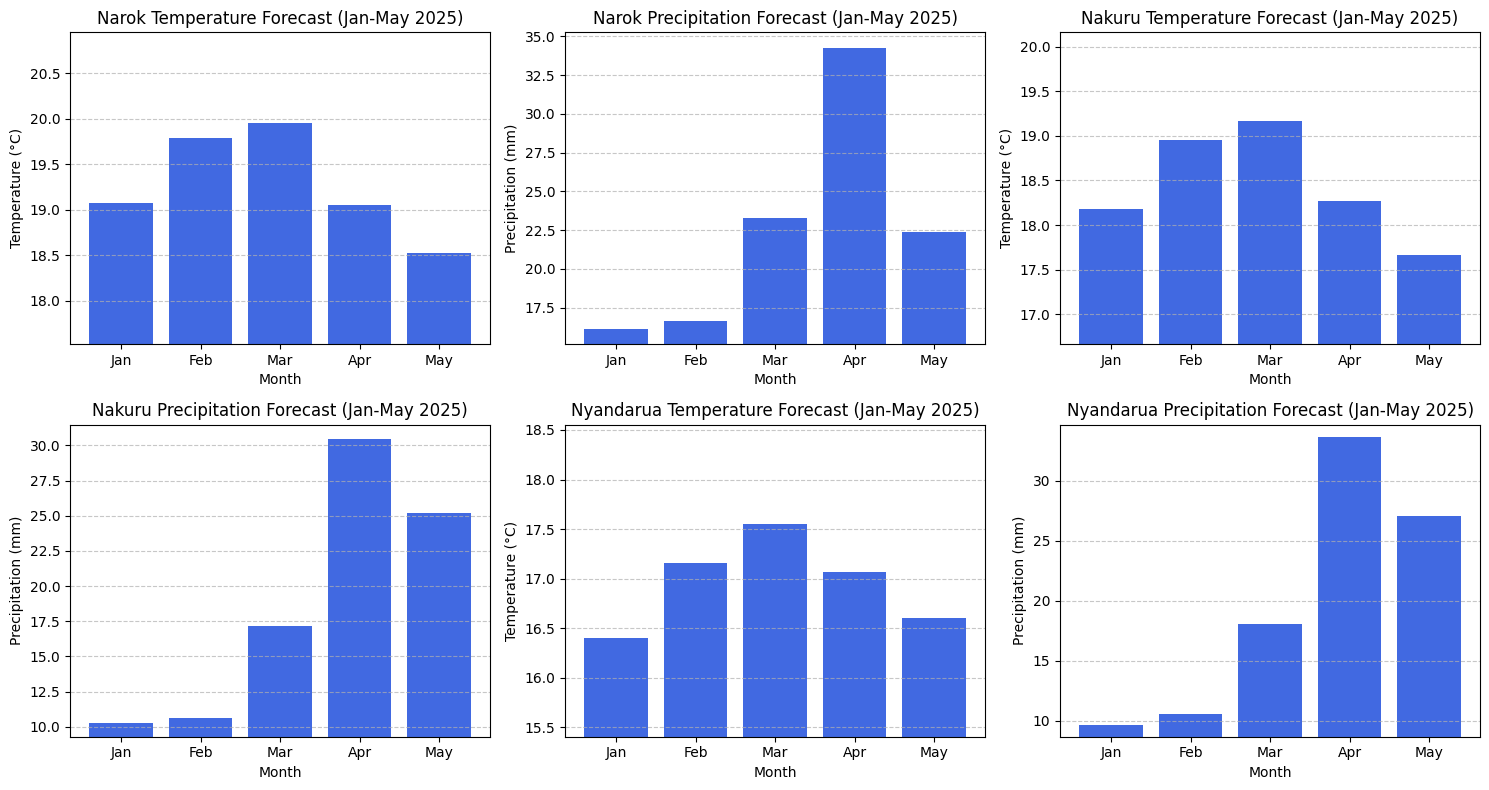

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming merged_data is your DataFrame with data from 1981 to June 2024
merged_data.rename(columns={"Date": "ds"}, inplace=True)
# Ensure ds is in datetime format
merged_data['ds'] = pd.to_datetime(merged_data['ds'])

# Filter data to 1981–June 2024
merged_data = merged_data[(merged_data['ds'] >= '1981-01-01') & (merged_data['ds'] <= '2024-06-30')]

# List of variables to forecast
variables = {
    "Temperature(deg C)_narok": "Narok Temperature",
    "Precipitation(mm)_narok": "Narok Precipitation",
    "Temperature(deg C)_nakuru": "Nakuru Temperature",
    "Precipitation(mm)_nakuru": "Nakuru Precipitation",
    "Temperature(deg C)_nyandarua": "Nyandarua Temperature",
    "Precipitation(mm)_nyandarua": "Nyandarua Precipitation",
}

# Function to plot bar graphs for Jan-May 2025
def plot_forecast_bar(forecast, label, ax):
    """
    Plots a bar graph for monthly forecast averages for Jan-May 2025 on a given axis.
    """
    # Aggregate daily forecasts to monthly averages
    forecast['month'] = forecast['Date'].dt.to_period('M')
    monthly_forecast = forecast.groupby('month')['Forecast'].mean().reset_index()
    monthly_forecast['month'] = monthly_forecast['month'].dt.to_timestamp()
    
    # Filter for Jan-May 2025
    monthly_forecast = monthly_forecast[(monthly_forecast['month'] >= '2025-01-01') & 
                                       (monthly_forecast['month'] <= '2025-05-01')]
    
    if monthly_forecast.empty:
        print(f"⚠ No forecast data available for {label}")
        return

    months = monthly_forecast['month'].dt.strftime('%b')
    ax.bar(months, monthly_forecast['Forecast'], color="royalblue")
    ax.set_xlabel("Month")
    ax.set_ylabel("Temperature (°C)" if "Temperature" in label else "Precipitation (mm)")
    ax.set_title(f"{label} Forecast (Jan-May 2025)")
    ax.set_ylim(min(monthly_forecast['Forecast']) - 1, max(monthly_forecast['Forecast']) + 1)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each variable
for idx, (column, label) in enumerate(variables.items()):
    print(f"Forecasting: {label}")

    # Prepare data
    df_temp = merged_data[['ds', column]].rename(columns={column: 'y'}).dropna()

    # Train Prophet model with tuned parameters
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(df_temp)

    # Create future dataframe from July 1, 2024 to May 31, 2025
    future = model.make_future_dataframe(periods=334, freq='D')

    # Generate forecast
    forecast = model.predict(future)

    # Filter for Jan 1 to May 31, 2025
    forecast_2025 = forecast[(forecast['ds'] >= '2025-01-01') & 
                            (forecast['ds'] <= '2025-05-31')][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Rename columns for CSV clarity
    forecast_2025.columns = ['Date', 'Forecast', 'Lower_CI', 'Upper_CI']

    # Save to CSV
    csv_filename = f"{label.replace(' ', '_')}_2025_forecast_prophet.csv"
    forecast_2025.to_csv(csv_filename, index=False)
    print(f"Saved forecast to {csv_filename}")

    # Plot bar graph on subplot
    plot_forecast_bar(forecast_2025, label, axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [50]:
import plotly.express as px
import plotly
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode

Forecast data dictionary: {('Narok', 'Precipitation'): 22.584579621011564, ('Nakuru', 'Precipitation'): 18.617957451056068, ('Nyandarua', 'Precipitation'): 19.64758350206607, ('Narok', 'Temperature'): 19.289877713204234, ('Nakuru', 'Temperature'): 18.46355990507294, ('Nyandarua', 'Temperature'): 16.963611202208174}
Forecast DF columns after splitting: ['Forecast', 'County', 'Variable']
Forecast DF shape: (6, 3)
Forecast DF head:
     Forecast     County       Variable
0  22.584580      Narok  Precipitation
1  18.617957     Nakuru  Precipitation
2  19.647584  Nyandarua  Precipitation
3  19.289878      Narok    Temperature
4  18.463560     Nakuru    Temperature
Shapefile columns: ['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY', 'Shape_Leng', 'Shape_Area', 'geometry']


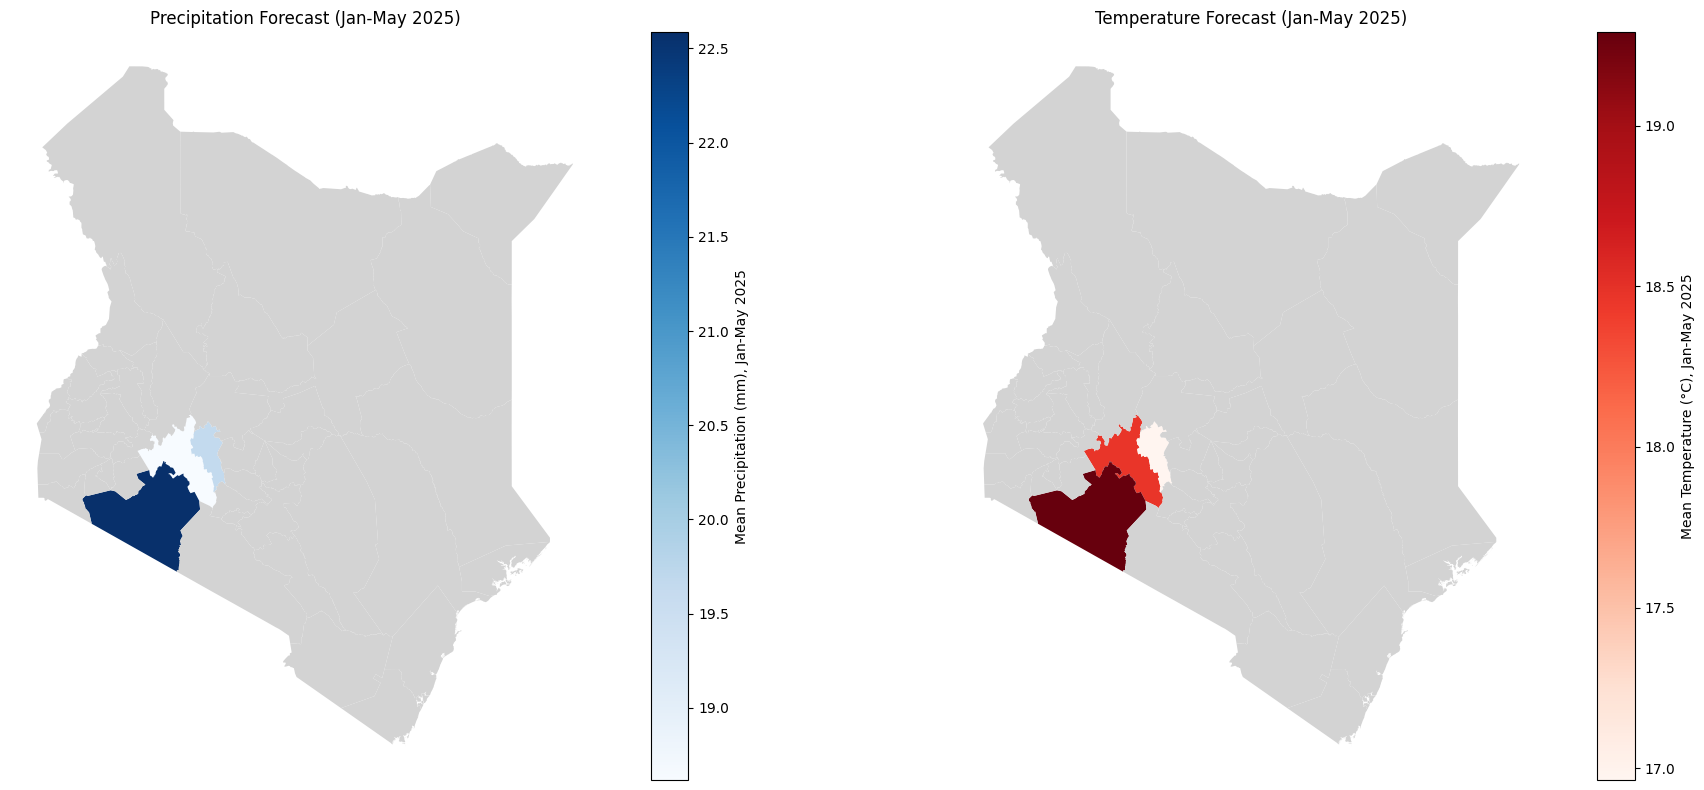

In [71]:


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Step 1: Load the forecast CSV files
forecast_files = {
    "Narok Precipitation": "Narok_Precipitation_2025_forecast_prophet.csv",
    "Nakuru Precipitation": "Nakuru_Precipitation_2025_forecast_prophet.csv",
    "Nyandarua Precipitation": "Nyandarua_Precipitation_2025_forecast_prophet.csv",
    "Narok Temperature": "Narok_Temperature_2025_forecast_prophet.csv",
    "Nakuru Temperature": "Nakuru_Temperature_2025_forecast_prophet.csv",
    "Nyandarua Temperature": "Nyandarua_Temperature_2025_forecast_prophet.csv",
}

# Aggregate forecast data
forecast_data = {}
for label, filename in forecast_files.items():
    file_path = Path(filename)
    if not file_path.exists():
        print(f"File {filename} not found. Please ensure Prophet code ran successfully.")
        continue
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    expected_columns = {'Date', 'Forecast', 'Lower_CI', 'Upper_CI'}
    if not all(col in df.columns for col in expected_columns):
        print(f"Unexpected columns in {filename}: {df.columns.tolist()}")
        continue
    mean_value = df['Forecast'].mean()
    county = label.split()[0]
    var_type = "Precipitation" if "Precipitation" in label else "Temperature"
    forecast_data[(county, var_type)] = mean_value

# Debug: Check the content of forecast_data
print("Forecast data dictionary:", forecast_data)
if not forecast_data:
    raise ValueError("No forecast data loaded. Check if CSV files exist in the working directory.")

# Convert to DataFrame
forecast_df = pd.DataFrame.from_dict(
    forecast_data, orient='index', columns=['Forecast']
).reset_index()

# Split the index tuple into County and Variable columns
forecast_df[['County', 'Variable']] = pd.DataFrame(forecast_df['index'].tolist(), index=forecast_df.index)
forecast_df = forecast_df.drop(columns=['index'])  # Remove the original index column

# Debug: Verify the structure
print("Forecast DF columns after splitting:", forecast_df.columns.tolist())
print("Forecast DF shape:", forecast_df.shape)
print("Forecast DF head:\n", forecast_df.head())

# Pivot for merging
forecast_pivot = forecast_df.pivot(index='County', columns='Variable', values='Forecast').reset_index()

# Step 2: Load Kenya counties shapefile
shapefile_path = r'C:\Users\HomePC\Downloads\kenyan-counties\County.shp'
kenya_gdf = gpd.read_file(shapefile_path)

# Check shapefile column names and adjust
print("Shapefile columns:", kenya_gdf.columns.tolist())
county_column = 'COUNTY'  # Adjust based on output
if county_column not in kenya_gdf.columns:
    raise ValueError(f"Column '{county_column}' not found in shapefile. Available columns: {kenya_gdf.columns.tolist()}")
kenya_gdf[county_column] = kenya_gdf[county_column].str.title()
forecast_pivot['County'] = forecast_pivot['County'].str.title()

# Step 3: Merge forecast data with geospatial data
merged_gdf = kenya_gdf.merge(forecast_pivot, how='left', left_on=county_column, right_on='County')

# Step 4: Plot choropleth maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'aspect': 'equal'})

# Precipitation choropleth
merged_gdf.plot(
    column='Precipitation',
    ax=ax1,
    legend=True,
    cmap='Blues',
    missing_kwds={'color': 'lightgrey', 'label': 'No Data'},
    legend_kwds={'label': "Mean Precipitation (mm), Jan-May 2025", 'orientation': "vertical"}
)
ax1.set_title("Precipitation Forecast (Jan-May 2025)")
ax1.set_axis_off()

# Temperature choropleth
merged_gdf.plot(
    column='Temperature',
    ax=ax2,
    legend=True,
    cmap='Reds',
    missing_kwds={'color': 'lightgrey', 'label': 'No Data'},
    legend_kwds={'label': "Mean Temperature (°C), Jan-May 2025", 'orientation': "vertical"}
)
ax2.set_title("Temperature Forecast (Jan-May 2025)")
ax2.set_axis_off()

plt.tight_layout()
plt.show()